#### Question 1
Use a real-world dataset (i.e. relational, text, image, video, voice files), prepare the dataset for modelling, consider one categorical variable in the dataset, and apply the classification task. To do so:  

* Provide the functional form of the predictive model for each algorithm.
* Train each model using different ratios of the trainset and visualize the performance of models using accuracy (y -axis) in terms of different ratio of trainsets (x-axis). Elaborate on the insights.
* Apply ensemble methods (bagging, boosting, stacking) on the base models, evaluate the performance of each ensemble technique in 100 Monte Carlo runs and visualize the performance of models using Boxplot.
* Select the best classifier and elaborate on its advantages and limitations.

Data Set Information : 

* URL : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

#### Imports

In [158]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Options
SVC, GNB, Dicesiontree

In [160]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [161]:
len(df.columns), len(df)

(14, 303)

In [162]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [163]:
X = df.drop("output", axis=1)
y = df["output"]

In [164]:
y.value_counts()

1    165
0    138
Name: output, dtype: int64

In [165]:
clfs = {
    "RF" : RandomForestClassifier(),
    "DT" : DecisionTreeClassifier(),
    "SVC" : SVC()
}

In [166]:
clf_acc_r1 = {}
clf_store_r1 = {}
clf_y_test_r1 = {}
clf_y_preds_r1 = {}
for key in clfs:
        for i in range(100):
                clf = clfs[key]
                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2)
                dt = clf.fit(X_train,y_train)
                y_preds = clf.predict(X_test) 
                actual = y_test
                predicted = y_preds
                accuracy = accuracy_score(actual, predicted)
        clf_acc_r1[key] = accuracy
        clf_store_r1[key] = dt
        clf_y_test_r1[key] = y_test
        clf_y_preds_r1[key] = y_preds

In [167]:
pd.DataFrame([clf_acc_r1])

,RF,DT,SVC
0,0.781893,0.748971,0.522634


In [168]:
clf_store_r1

{'RF': RandomForestClassifier(), 'DT': DecisionTreeClassifier(), 'SVC': SVC()}

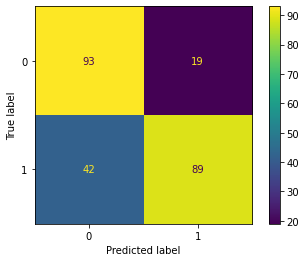

In [169]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test_r1["DT"], y_pred= clf_y_preds_r1["DT"]);

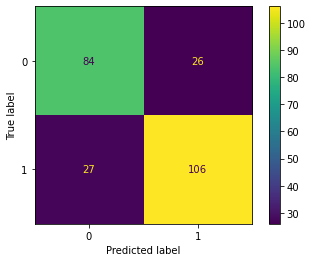

In [170]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test_r1["RF"], y_pred= clf_y_preds_r1["RF"]);

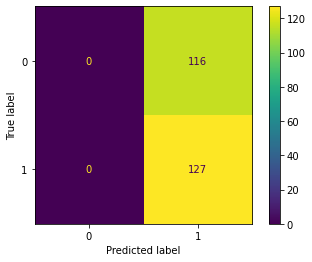

In [171]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test_r1["SVC"], y_pred= clf_y_preds_r1["SVC"]);

In [172]:
clf_acc_r2 = {}
clf_store_r2 = {}
clf_y_test_r2 = {}
clf_y_preds_r2 = {}
for key in clfs:
        for i in range(100):
                clf = clfs[key]
                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5)
                dt = clf.fit(X_train,y_train)
                y_preds = clf.predict(X_test) 
                actual = y_test
                predicted = y_preds
                accuracy = accuracy_score(actual, predicted)
        clf_acc_r2[key] = accuracy
        clf_store_r2[key] = dt
        clf_y_test_r2[key] = y_test
        clf_y_preds_r2[key] = y_preds

In [173]:
pd.DataFrame([clf_acc_r2])

,RF,DT,SVC
0,0.796053,0.769737,0.513158


In [174]:
clf_store_r2

{'RF': RandomForestClassifier(), 'DT': DecisionTreeClassifier(), 'SVC': SVC()}

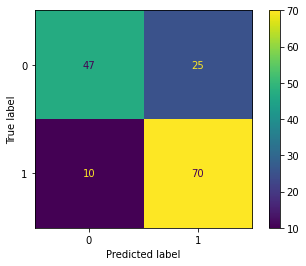

In [176]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test_r2["DT"], y_pred= clf_y_preds_r2["DT"]);

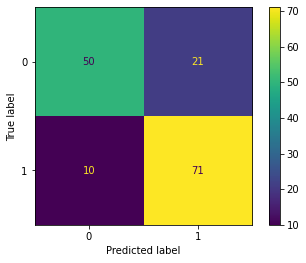

In [177]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test_r2["RF"], y_pred= clf_y_preds_r2["RF"]);

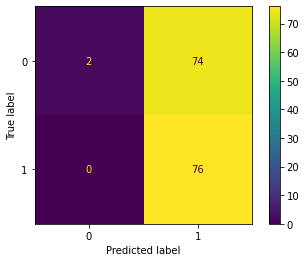

In [178]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test_r2["SVC"], y_pred= clf_y_preds_r2["SVC"]);
